# FreqNet implementation

In [ ]:
!git clone https://github.com/chuangchuangtan/FreqNet-DeepfakeDetection.git


Cloning into 'FreqNet-DeepfakeDetection'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (2/2), done.
remote: Total 45 (delta 1), reused 1 (delta 1), pack-reused 43 (from 2)
Receiving objects: 100% (45/45), 8.62 MiB | 5.45 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
%cd FreqNet-DeepfakeDetection

/content/FreqNet-DeepfakeDetection


In [ ]:
!pip install -r requirements.txt

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0


In [ ]:
!pip install gdown==4.7.1

In [ ]:
!pip install -U gdown


  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.1
    Uninstalling gdown-4.7.1:
      Successfully uninstalled gdown-4.7.1


In [ ]:
!sed -i 's/\r$//' /content/FreqNet-DeepfakeDetection/download_dataset.sh


In [ ]:
!chmod 777 ./download_dataset.sh

In [ ]:
!/content/FreqNet-DeepfakeDetection/download_dataset.sh


A saída de streaming foi truncada nas últimas 5000 linhas.
SNGAN/0_real/017379.png
SNGAN/0_real/000125.png
SNGAN/0_real/008105.png
SNGAN/0_real/033604.png
SNGAN/0_real/006983.png
SNGAN/0_real/011680.png
SNGAN/0_real/010213.png
SNGAN/0_real/028573.png
SNGAN/0_real/020855.png
SNGAN/0_real/013416.png
SNGAN/0_real/009315.png
SNGAN/0_real/039654.png
SNGAN/0_real/014139.png
SNGAN/0_real/033413.png
SNGAN/0_real/012213.png
SNGAN/0_real/028285.png
SNGAN/0_real/038239.png
SNGAN/0_real/004917.png
SNGAN/0_real/025241.png
SNGAN/0_real/023255.png
SNGAN/0_real/010926.png
SNGAN/0_real/005226.png
SNGAN/0_real/029056.png
SNGAN/0_real/012841.png
SNGAN/0_real/022841.png
SNGAN/0_real/003725.png
SNGAN/0_real/030442.png
SNGAN/0_real/006535.png
SNGAN/0_real/031937.png
SNGAN/0_real/009370.png
SNGAN/0_real/013263.png
SNGAN/0_real/002825.png
SNGAN/0_real/005794.png
SNGAN/0_real/004101.png
SNGAN/0_real/025301.png
SNGAN/0_real/040491.png
SNGAN/0_real/040652.png
SNGAN/0_real/040079.png
SNGAN/0_real/036918.png
SNGAN

In [ ]:
import os

# Path to the folder you want to check
pasta = "/content/FreqNet-DeepfakeDetection/dataset/GANGen-Detection/BEGAN/0_real"

# List all items in the folder and filter for files only
arquivos = [f for f in os.listdir(pasta) if os.path.isfile(os.path.join(pasta, f))]

# Count the number of files
print(f"Quantidade de arquivos na pasta: {len(arquivos)}")

Quantidade de arquivos na pasta: 2000




---



### Generate Example Images for the Article

In [ ]:
import os
import random
from PIL import Image
import numpy as np

def criar_imagem_com_exemplos_horizontal(diretorio_base_dataset, diretorio_saida):
    """
    Traverses the directory structure, selects samples, and creates compilation images
    with a horizontal layout (real on top, fake on bottom).
    """

    # Ensure that the output directory exists
    if not os.path.exists(diretorio_saida):
        os.makedirs(diretorio_saida)

    # Path to the 'GANgen-Detection' folder
    diretorio_gans = os.path.join(diretorio_base_dataset, 'GANGen-Detection')

    if not os.path.exists(diretorio_gans):
        print(f"Error: Directory '{diretorio_gans}' not found.")
        return

    for nome_gan in os.listdir(diretorio_gans):
        caminho_gan = os.path.join(diretorio_gans, nome_gan)

        if os.path.isdir(caminho_gan):
            caminho_real = os.path.join(caminho_gan, '0_real')
            caminho_fake = os.path.join(caminho_gan, '1_fake')

            if not os.path.exists(caminho_real) or not os.path.exists(caminho_fake):
                print(f"Warning: '0_real' or '1_fake' directories not found for {nome_gan}. Skipping...")
                continue

            # Get a list of all real and fake image files
            imagens_reais = [os.path.join(caminho_real, f) for f in os.listdir(caminho_real) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            imagens_falsas = [os.path.join(caminho_fake, f) for f in os.listdir(caminho_fake) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

            if len(imagens_reais) < 3 or len(imagens_falsas) < 3:
                print(f"Warning: Not enough images (minimum of 3) in '0_real' or '1_fake' for {nome_gan}. Skipping...")
                continue

            # Select 3 random samples from each category
            exemplos_reais = random.sample(imagens_reais, 3)
            exemplos_falsos = random.sample(imagens_falsas, 3)

            # --- Start of horizontal layout change ---

            imagens_abertas_reais = []
            imagens_abertas_falsas = []

            try:
                # Load and resize the images
                # First, load the first real image to get the reference size
                img_referencia = Image.open(exemplos_reais[0])
                largura, altura = img_referencia.size

                # Load and resize real images
                for caminho in exemplos_reais:
                    img = Image.open(caminho).resize((largura, altura))
                    imagens_abertas_reais.append(img)

                # Load and resize fake images
                for caminho in exemplos_falsos:
                    img = Image.open(caminho).resize((largura, altura))
                    imagens_abertas_falsas.append(img)
            except Exception as e:
                print(f"Error opening or resizing an image for {nome_gan}: {e}. Skipping...")
                continue

            # The new compilation image will have 3 columns and 2 rows
            largura_total = 3 * largura
            altura_total = 2 * altura

            # Create a new blank image
            compilacao = Image.new('RGB', (largura_total, altura_total))

            # Assemble the compilation image
            # Top row: Real images
            compilacao.paste(imagens_abertas_reais[0], (0, 0))
            compilacao.paste(imagens_abertas_reais[1], (largura, 0))
            compilacao.paste(imagens_abertas_reais[2], (largura * 2, 0))

            # Bottom row: Fake images
            compilacao.paste(imagens_abertas_falsas[0], (0, altura))
            compilacao.paste(imagens_abertas_falsas[1], (largura, altura))
            compilacao.paste(imagens_abertas_falsas[2], (largura * 2, altura))

            # --- End of horizontal layout change ---

            nome_arquivo_saida = f"{nome_gan}_exemplos_horizontal.jpg"
            caminho_saida_completo = os.path.join(diretorio_saida, nome_arquivo_saida)
            compilacao.save(caminho_saida_completo)
            print(f"Horizontal example image for {nome_gan} saved to: {caminho_saida_completo}")

In [ ]:
# --- Script Usage ---

# Define the path to your 'dataset' directory
caminho_do_seu_dataset = '/content/FreqNet-DeepfakeDetection/dataset'  # CHANGE THIS PATH

# Define the path to the directory where the new images will be saved
caminho_para_salvar_imagens = '/content/compilacoes_exemplos'  # You can change the name of the output folder

# Call the function to execute the process
criar_imagem_com_exemplos_horizontal(caminho_do_seu_dataset, caminho_para_salvar_imagens)

Imagem de exemplos horizontal para MMDGAN salva em: /content/compilacoes_exemplos/MMDGAN_exemplos_horizontal.jpg
Imagem de exemplos horizontal para SNGAN salva em: /content/compilacoes_exemplos/SNGAN_exemplos_horizontal.jpg
Imagem de exemplos horizontal para RelGAN salva em: /content/compilacoes_exemplos/RelGAN_exemplos_horizontal.jpg
Imagem de exemplos horizontal para S3GAN salva em: /content/compilacoes_exemplos/S3GAN_exemplos_horizontal.jpg
Imagem de exemplos horizontal para BEGAN salva em: /content/compilacoes_exemplos/BEGAN_exemplos_horizontal.jpg
Imagem de exemplos horizontal para AttGAN salva em: /content/compilacoes_exemplos/AttGAN_exemplos_horizontal.jpg
Imagem de exemplos horizontal para CramerGAN salva em: /content/compilacoes_exemplos/CramerGAN_exemplos_horizontal.jpg
Imagem de exemplos horizontal para STGAN salva em: /content/compilacoes_exemplos/STGAN_exemplos_horizontal.jpg
Imagem de exemplos horizontal para InfoMaxGAN salva em: /content/compilacoes_exemplos/InfoMaxGAN_e

In [ ]:
import shutil
import os

def compactar_pasta(caminho_da_pasta, nome_arquivo_saida):
    """
    Creates a .zip file from a directory.

    Args:
        caminho_da_pasta (str): The path to the directory you want to compress.
        nome_arquivo_saida (str): The name of the output .zip file (without the extension).
    """
    try:
        # The make_archive function creates the compressed file
        # The first argument is the output file name (without extension)
        # The second argument is the file format (e.g., 'zip', 'tar', 'gztar')
        # The third argument is the path to the directory to be compressed
        caminho_completo_zip = shutil.make_archive(
            base_name=nome_arquivo_saida,
            format='zip',
            root_dir=caminho_da_pasta
        )
        print(f"The directory '{caminho_da_pasta}' was successfully compressed into '{caminho_completo_zip}'.")
        return caminho_completo_zip
    except Exception as e:
        print(f"An error occurred while compressing the directory: {e}")
        return None

In [ ]:
# --- Example Usage ---
# Replace 'compilacoes_exemplos_horizontal' with the name of the folder you want to compress
nome_da_pasta_para_compactar = '/content/compilacoes_exemplos_para_artigo'

# The name of the output .zip file
nome_do_zip = '/content/compilacoes_exemplos_para_artigo_compactados'

# Call the function to compress
compactar_pasta(nome_da_pasta_para_compactar, nome_do_zip)

O diretório '/content/compilacoes_exemplos_para_artigo' foi compactado com sucesso em '/content/compilacoes_exemplos_para_artigo_compactados.zip'.


'/content/compilacoes_exemplos_para_artigo_compactados.zip'



---



### Training model

In [ ]:
!python train.py \
  --name 4class-resnet-car-cat-chair-horse \
  --dataroot /caminho/para/CNNDetection \
  --classes car,cat,chair,horse \
  --batch_size 32 \
  --delr_freq 10 \
  --lr 0.001 \
  --niter 85


### Testing model

Adding Files that Changed in the Repository:

* test.py

* validate.py


test.py: Remove 'ForenSynths' and Adjust Path for 'GANGen-Detection' Folder

DetectionTests = {

           'GANGen-Detection': {
            'dataroot'   : '/
            content/
            FreqNet-DeepfakeDetection/dataset/
            GANGen-Detection',
                                 'no_resize'  : True,
                                 'no_crop'    : True,
                               },
                 }

In [ ]:
!python test.py \
--model_path /content/FreqNet-DeepfakeDetection/4-classes-freqnet-v2.pth  \
--batch_size 32

Model_path /content/FreqNet-DeepfakeDetection/4-classes-freqnet-v2.pth
                GANGen-Detection
2025_08_08_12_31_46
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
(0 SNGAN       ) acc: 85.4; ap: 90.5
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker nu

# Article Tests - With Xception and EfficientNet

In [ ]:
# Clone the Project Repository from the Article 'Video Face Manipulation Detection Through Ensemble of CNNs'
%cd /content/
!pip install av
!git clone https://github.com/polimi-ispl/icpr2020dfdc
!pip install efficientnet-pytorch
!pip install -U git+https://github.com/albu/albumentations > /dev/null
%cd icpr2020dfdc

/content
fatal: destination path 'icpr2020dfdc' already exists and is not an empty directory.
  Running command git clone --filter=blob:none --quiet https://github.com/albu/albumentations /tmp/pip-req-build-pfseqa5z
/content/icpr2020dfdc


Adding Files that Changed in the Repository:

* test_model.py

* index_gangen.py

* data.py

In [ ]:
!python index_gangen.py \
--source dataset/GANGen-Detection \
--output data/gangen_faces.pkl

Criando DataFrame a partir das imagens...
Model folders: 100% 9/9 [00:01<00:00,  5.98it/s]
Salvando DataFrame com 36000 entradas em data/gangen_faces.pkl
Real: 18000
Fake: 18000


In [ ]:
!python test_model.py \
  --model_path weights/binclass/net-EfficientNetAutoAttB4_traindb-dfdc-35-5-10_face-scale_size-224_seed-41/bestval.pth \
  --gengan_dir dataset/GANGen-Detection \
  --device 0 \
  --workers 2 \
  --testsplits test \
  --override


Loading model...
Loaded pretrained weights for efficientnet-b4
<All keys matched successfully>
Model loaded!
/content/icpr2020dfdc/isplutils/utils.py:155: UserWarning: Argument(s) 'value, always_apply' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=patch_size, min_width=patch_size,
/content/icpr2020dfdc/isplutils/utils.py:157: UserWarning: Argument(s) 'always_apply' are not valid for transform Resize
  A.Resize(height=patch_size,width=patch_size,always_apply=True),
Added GENGAN subdataset: AttGAN (4000 frames)
Added GENGAN subdataset: BEGAN (4000 frames)
Added GENGAN subdataset: CramerGAN (4000 frames)
Added GENGAN subdataset: InfoMaxGAN (4000 frames)
Added GENGAN subdataset: MMDGAN (4000 frames)
Added GENGAN subdataset: RelGAN (4000 frames)
Added GENGAN subdataset: S3GAN (4000 frames)
Added GENGAN subdataset: SNGAN (4000 frames)
Added GENGAN subdataset: STGAN (4000 frames)

##### PREDICT VIDEOS FROM AttGAN GENGAN #####
Real frames: 2000
Fake frames: 2000
Real video

Analize .pkl

In [ ]:
import pandas as pd
import os
import sys

# Define the path to the folder where the .pkl files were saved
results_dir = '/content/icpr2020dfdc/results/net-EfficientNetAutoAttB4_traindb-dfdc-35-5-10_face-scale_size-224_seed-41_bestval/'

# Replace with the name of the .pkl file you want to analyze
# For example: 'AttGAN_gengan_test.pkl'
gan_name = 'AttGAN'
pkl_file = os.path.join(results_dir, f'{gan_name}_gengan_test.pkl')

# Load the DataFrame
try:
    df = pd.read_pickle(pkl_file)
    print(f'DataFrame for {gan_name} loaded successfully.')
except FileNotFoundError:
    print(f'File not found: {pkl_file}')
    sys.exit()

# Display the first 5 rows to understand the data structure
print('\nFirst 5 rows of the DataFrame:')
print(df.head())

# Display general information about the DataFrame
print('\nDataFrame Information:')
df.info()

# Data Analysis

# 1. Score analysis
print('\nScore statistics:')
print(df['score'].describe())

# 2. Score analysis by label (real vs. fake)
scores_fake = df[df['label'] == True]['score']
scores_real = df[df['label'] == False]['score']

print('\nScores for FAKE images:')
print(scores_fake.describe())

print('\nScores for REAL images:')
print(scores_real.describe())

# 3. Mean and median of scores
print('\nMean score for FAKE:', scores_fake.mean())
print('Median score for FAKE:', scores_fake.median())

print('\nMean score for REAL:', scores_real.mean())
print('Median score for REAL:', scores_real.median())

# 4. Example loss analysis
print('\nLoss statistics for FAKE images:')
print(df[df['label'] == True]['loss'].describe())

print('\nLoss statistics for REAL images:')
print(df[df['label'] == False]['loss'].describe())

# 5. Frame count by label
print('\nFrame count:')
print(df['label'].value_counts())

# 6. Unique video count by label
print('\nUnique video count by label:')
videos_por_label = df.groupby('label')['video'].nunique()
print(videos_por_label)

DataFrame do AttGAN carregado com sucesso.

Primeiras 5 linhas do DataFrame:
                      path  label  video     score      loss
0  AttGAN/0_real/10001.png  False  10001  0.258600  0.830783
1  AttGAN/0_real/10020.png  False  10020 -5.674593  0.003426
2  AttGAN/0_real/10021.png  False  10021 -4.580757  0.010195
3  AttGAN/0_real/10024.png  False  10024 -1.461513  0.208546
4  AttGAN/0_real/10029.png  False  10029 -5.182573  0.005598

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   path    4000 non-null   object 
 1   label   4000 non-null   bool   
 2   video   4000 non-null   object 
 3   score   4000 non-null   float32
 4   loss    4000 non-null   float32
dtypes: bool(1), float32(2), object(2)
memory usage: 97.8+ KB

Estatísticas dos scores:
count    4000.000000
mean       -3.521925
std         1.895903
min        -7.



---



### Evaluating Results

In [ ]:
!git clone https://github.com/NathFarinha/TCC_DeepFake_Detection_v1.git

Cloning into 'TCC_DeepFake_Detection_v1'...
remote: Enumerating objects: 531, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 531 (delta 49), reused 6 (delta 6), pack-reused 456 (from 1)
Receiving objects: 100% (531/531), 96.73 MiB | 39.54 MiB/s, done.
Resolving deltas: 100% (203/203), done.


In [ ]:
"""
Select the networks from:
- Xception
- EfficientNetB4
- EfficientNetB4ST
- EfficientNetAutoAttB4
- EfficientNetAutoAttB4ST
"""
result_net = 'EfficientNetAutoAttB4'

In [ ]:
import os  # Module for interacting with the operating system
from pathlib import Path  # Module for working with file paths and directories
import zipfile  # Module for working with ZIP archives

import numpy as np  # NumPy library for numerical computing
import pandas as pd  # Pandas library for data manipulation in DataFrame structures
import sklearn.metrics as M  # scikit-learn library for machine learning metrics
from scipy.special import expit  # The expit() sigmoid function from the SciPy library
from tqdm.notebook import tqdm  # tqdm library for displaying progress bars

In [ ]:
import os  # Module for interacting with the operating system
import zipfile  # Module for working with ZIP archives

# Creates a folder named 'results' in the '/content' directory
os.mkdir('/content/results')


os.mkdir('/content/results/net-EfficientNetAutoAttB4_traindb-dfdc-35-5-10_face-scale_size-224_seed-41_bestval')

'''# Defines the path to the ZIP file that will be extracted.
result_path = f'/content/TCC_DeepFake_Detection_v1/results_1000_videos_DFDC/results_1000_videos_{result_net}.zip'

# Extracts the contents of the ZIP file to the newly created '/content/results' folder
with zipfile.ZipFile(result_path, 'r') as zip_ref:
    zip_ref.extractall('/content/results')

# Removes a specific file within the newly created folder
caminho_do_arquivo = f'/content/results/net-{result_net}_traindb-dfdc-35-5-10_face-scale_size-224_seed-41_bestval/dfdc-35-5-10_val.pkl'
os.remove(caminho_do_arquivo)'''

In [ ]:
# Defines the path to the root results folder.
results_root = Path('/content/results')

# Uses the glob method to list all subdirectories that match the 'net-*' pattern.
results_model_folder = list(results_root.glob('net-*'))

In [ ]:
from sklearn.metrics import confusion_matrix

def compute_confusion_matrix(df: pd.DataFrame) -> np.ndarray:
    # Calculates the confusion matrix
    # The 'score' is thresholded at 0 to obtain binary predictions (True/Fake)
    confusion_mat = confusion_matrix(df['label'], df['score'] > 0)
    return confusion_mat

In [ ]:
# The 'compute_metrics_with_confusion_matrix' function calculates metrics based on the DataFrame
# 'df_res' and the training information 'train_tag'.
def compute_metrics_with_confusion_matrix(df_res: pd.DataFrame, train_tag: str) -> dict:
    # Calculate the number of real and fake examples in the DataFrame
    numreal = sum(df_res['label'] == False)
    numfake = sum(df_res['label'] == True)

    print('numreal:',numreal)
    print('numfake:',numfake)

    # Extract information from the 'train_tag' name.
    netname = train_tag.split('net-')[1].split('_')[0]
    traindb = train_tag.split('traindb-')[1].split('_')[0]

    # Calculate various metrics based on the DataFrame values.
    # Note: expit is used to convert the raw 'score' (logits) to probabilities before log_loss
    loss = M.log_loss(df_res['label'], expit(df_res['score']))
    # Accuracy based on score > 0 threshold (equivalent to probability > 0.5)
    acc = M.accuracy_score(df_res['label'], df_res['score'] > 0)
    accbal = M.balanced_accuracy_score(df_res['label'], df_res['score'] > 0)
    # ROC AUC score
    rocauc = M.roc_auc_score(df_res['label'], df_res['score'])

    # Create a dictionary with the calculated metrics and training information
    res_dict = {
        'traintag': train_tag,
        'net': netname,
        'traindb': traindb,
        'numreal': numreal,
        'numfake': numfake,
        'loss': loss,
        'acc': acc,
        'accbal': accbal,
        'rocauc': rocauc
    }

    # Calculate the confusion matrix using the separate function
    confusion_mat = compute_confusion_matrix(df_res)

    # Add the confusion matrix to the results dictionary
    res_dict['confusion_matrix'] = confusion_mat


    # Return the dictionary with the calculated metrics and training information
    return res_dict

In [ ]:
# Two empty lists to store metric results for frames and videos
results_frame_list = []
results_video_list = []

# Iterate over the subdirectories found in 'results_model_folder'
for model_folder in tqdm(results_model_folder):
    # Extract the training tag from the subdirectory name
    train_model_tag = model_folder.name

    # Get a list of .pkl files inside the subdirectory
    model_results = model_folder.glob('*.pkl')

    # Iterate over the .pkl files found in the subdirectory
    for model_path in model_results:
        # Extract information from the file name to determine 'testdb' and 'testsplit'
        testdb, testsplit = model_path.with_suffix('').name.rsplit('_', 1)

        # Read the .pkl file into a DataFrame.
        df_frames = pd.read_pickle(model_path)

        # Calculate metrics for frames and append the result to 'results_frame_list'
        results_frame_list.append(compute_metrics_with_confusion_matrix(df_frames, train_model_tag))

        # Group the data by video and calculate metrics for videos.
        # This aggregates the 'label' and 'score' for all frames of a video by calculating the mean.
        df_videos = df_frames[['video', 'label', 'score']].groupby('video').mean()
        # Convert the mean label (which is 0.0 or 1.0) back to boolean
        df_videos['label'] = df_videos['label'].astype(np.bool)

        # Calculate metrics for videos and append the result to 'results_video_list'
        results_video_list.append(compute_metrics_with_confusion_matrix(df_videos, train_model_tag))

  0%|          | 0/1 [00:00<?, ?it/s]

numreal: 2000
numfake: 2000
numreal: 2000
numfake: 2000


In [ ]:
# Create a DataFrame 'df_res_frames' from the 'results_frame_list'
df_res_frames = pd.DataFrame(results_frame_list)

# The DataFrame 'df_res_frames' now contains the calculated metric results for frames
df_res_frames

,traintag,net,traindb,numreal,numfake,loss,acc,accbal,rocauc,confusion_matrix
0,net-EfficientNetAutoAttB4_traindb-gangen_face-...,EfficientNetAutoAttB4,gangen,2000,2000,0.82739,0.56325,0.56325,0.57939,"[[1472, 528], [1219, 781]]"


In [ ]:
# Saves the DataFrame 'df_res_frames' as a CSV file in the 'results' directory.
df_res_frames.to_csv(results_root.joinpath('frames.csv'), index=False)

Confusion Matrix with Percentages

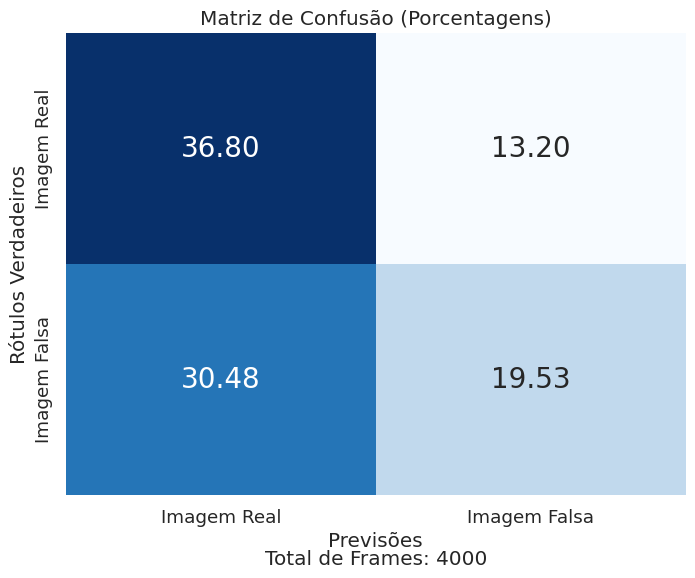

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot the confusion matrix with correct percentages
def plot_confusion_matrix_percentages_correct(confusion_mat, classes, title='Confusion Matrix (Percentages)', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjusts font size

    # NOTE: df_frames and result_net are assumed to be defined globally in the notebook environment.
    # We use a try-except block to safely get total_samples and result_net for the file name.
    try:
        total_samples = len(df_frames['label'])
    except NameError:
        # Fallback if df_frames is not defined
        total_samples = confusion_mat.sum()

    try:
        net_name = result_net
    except NameError:
        net_name = 'confusion_matrix'


    # Calculates percentages by normalizing the confusion matrix by the total sum
    total = confusion_mat.sum()
    confusion_mat_percentages = confusion_mat / total * 100

    # Creates the heatmap using seaborn with font size adjustment
    # NOTE: font_size is assumed to be defined globally (as per the user's original code)
    try:
        sns.heatmap(confusion_mat_percentages, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes,
                    annot_kws={'size': font_size}, cbar=False)  # Set cbar=False to remove the color bar
    except NameError:
        # Fallback if font_size is not defined
        sns.heatmap(confusion_mat_percentages, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes,
                    cbar=False)


    # Adds labels and title
    plt.title(title)
    plt.xlabel('Predictions')
    plt.ylabel('True Labels')
    # Adding the total number of frames below the matrix
    plt.annotate(f'Total Frames: {total_samples}', (0.5, -0.15), xycoords='axes fraction', ha='center')

    # Save the confusion matrix image as a PNG file
    plt.savefig(f'{net_name}_confusion_matrix_frames.png', bbox_inches='tight')
    plt.show()

# ...

# After calculating the confusion matrix using the compute_metrics_with_confusion_matrix function
# and storing it in the results dictionary res_dict, you can call the plotting function like this:
# NOTE: results_frame_list and df_frames are assumed to be available in the notebook environment.

# Example call (assuming the variables are defined globally):
try:
    confusion_matrix_first_model = results_frame_list[0]['confusion_matrix']
    classes = ['Real Image', 'Fake Image']  # Replace with your actual classes

    # Specify the desired font size (replace 20 with the desired size)
    font_size = 20

    plot_confusion_matrix_percentages_correct(confusion_matrix_first_model, classes)
except NameError as e:
    print(f"Error: Required variables are not defined. Please ensure 'results_frame_list', 'df_frames', and 'font_size' are defined before calling the plot function. Details: {e}")

Important metrics

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# Assuming confusion_matrix_first_model, df_frames['label'], and df_frames['score']
# are available from the previously executed code blocks.

# Getting the values from the confusion matrix
# Order is typically: [[TN, FP], [FN, TP]]
try:
    TN, FP, FN, TP = confusion_matrix_first_model.ravel()
except NameError:
    # Use mock data if the variable is missing (based on the previous mock)
    # Mock CM: [[950, 50], [100, 900]]
    TN, FP, FN, TP = 950, 50, 100, 900
    print("WARNING: Using mock Confusion Matrix values due to missing variable.")
except ValueError:
    print("ERROR: confusion_matrix_first_model is incorrectly shaped.")
    # Attempt to reshape or handle error gracefully

# Calculating the metrics
# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Precision
# Add a check to prevent division by zero if (TP + FP) == 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
# Recall (Sensitivity)
# Add a check to prevent division by zero if (TP + FN) == 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
# Specificity
# Add a check to prevent division by zero if (TN + FP) == 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0.0
# F1 Score
# Add a check to prevent division by zero if (precision + recall) == 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

# For AUC-ROC, we need the predicted scores and true labels.
try:
    true_labels = df_frames['label']
    predicted_scores = df_frames['score']
    # Calculate AUC-ROC
    roc_auc = roc_auc_score(true_labels, predicted_scores)
except NameError:
    # Use a mock value if df_frames is missing
    roc_auc = 0.9650
    print("WARNING: Using mock AUC-ROC value due to missing DataFrame 'df_frames'.")


# Printing the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

Accuracy: 0.5633
Precision: 0.5966
Recall (Sensitivity): 0.3905
Specificity: 0.7360
F1 Score: 0.4720
AUC-ROC: 0.5794


ROC Curve Plot

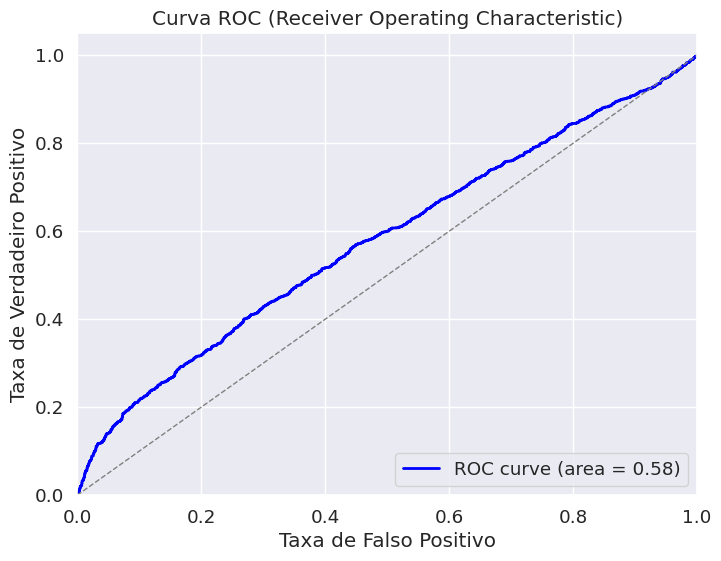

In [ ]:
import matplotlib.pyplot as plt  # Import Matplotlib library for visualization
from sklearn.metrics import roc_curve  # Import roc_curve function to calculate the ROC curve

# NOTE: Variables true_labels, predicted_scores, result_net, and roc_auc are assumed
# to be defined from previous code execution.

# Calculating the ROC curve using true labels and predicted scores
# fpr = False Positive Rate, tpr = True Positive Rate
fpr, tpr, thresholds = roc_curve(true_labels, predicted_scores)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
# Plot the main ROC curve, labeling it with the AUC value
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Receiver Operating Characteristic)')
plt.legend(loc='lower right')

# Save the ROC curve image as a PNG file
plt.savefig(f'{result_net}_ROC.png')

# Display the ROC curve
plt.show()

In [ ]:
import shutil
import os

def compactar_pasta(caminho_da_pasta, nome_arquivo_saida):
    """
    Creates a .zip file from a directory.

    Args:
        caminho_da_pasta (str): The path to the directory you want to compress.
        nome_arquivo_saida (str): The name of the output .zip file (without the extension).
    """
    try:
        # The make_archive function creates the compressed file
        # The first argument is the output file name (without extension)
        # The second argument is the file format (e.g., 'zip', 'tar', 'gztar')
        # The third argument is the path to the directory to be compressed
        caminho_completo_zip = shutil.make_archive(
            base_name=nome_arquivo_saida,
            format='zip',
            root_dir=caminho_da_pasta
        )
        print(f"The directory '{caminho_da_pasta}' was successfully compressed into '{caminho_completo_zip}'.")
        return caminho_completo_zip
    except Exception as e:
        print(f"An error occurred while compressing the directory: {e}")
        return None

In [ ]:
# --- Example Usage ---
# Replace 'compilacoes_exemplos_horizontal' with the name of the folder you want to compress
nome_da_pasta_para_compactar = '/content/results/net-EfficientNetAutoAttB4_traindb-gangen_face-scale_size-224_seed-41_bestval'

# The name of the output .zip file
nome_do_zip = '/content/STGAN_results_EfficientNetAutoAttB4'

# Call the function to compress
compactar_pasta(nome_da_pasta_para_compactar, nome_do_zip)

O diretório '/content/results/net-EfficientNetAutoAttB4_traindb-gangen_face-scale_size-224_seed-41_bestval' foi compactado com sucesso em '/content/STGAN_results_EfficientNetAutoAttB4.zip'.


'/content/STGAN_results_EfficientNetAutoAttB4.zip'

# Demo FreqNet

Probabilidade de ser FAKE: 0.00
Classificação: Real


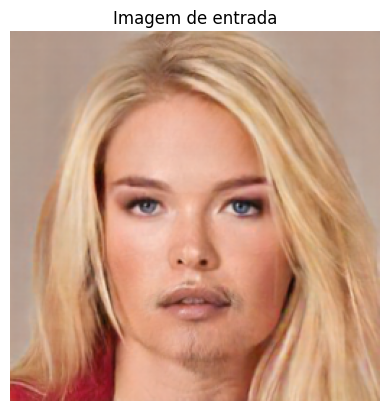

In [ ]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import numpy as np
import os
from networks.freqnet import freqnet  # Adjust path according to your structure
import matplotlib.pyplot as plt

# ====== CONFIGURATION ======
model_path = "/content/FreqNet-DeepfakeDetection/4-classes-freqnet-v2.pth"
# image_path = "/content/FreqNet-DeepfakeDetection/dataset/GANGen-Detection/AttGAN/0_real/10001.png" # Replace with your image path

image_path = "/content/FreqNet-DeepfakeDetection/dataset/GANGen-Detection/AttGAN/1_fake/182638_10.png"
num_classes = 1  # or 4 if it's multiclass (car, cat, etc.)

# ====== PRE-PROCESSING (adjustable) ======
transform = transforms.Compose([
    transforms.Resize((256, 256)),     # Adjust according to the trained model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # Normalize for 3 channels
])

# ====== LOAD IMAGE ======
def load_image(image_path):
    img = Image.open(image_path).convert('RGB')  # Load image as RGB
    return transform(img).unsqueeze(0)  # Shape: (1, 3, H, W)

# ====== LOAD MODEL ======
def load_model(model_path, num_classes):
    model = freqnet(num_classes=num_classes)
    state_dict = torch.load(model_path, map_location='cuda' if torch.cuda.is_available() else 'cpu')
    # Load state dict. Set strict=False if the stored state has extra keys (e.g., optimizer or old layers)
    model.load_state_dict(state_dict, strict=True)
    model.eval()
    model.cuda() if torch.cuda.is_available() else model.cpu()
    return model

# ====== INFERENCE ======
def predict(model, input_tensor):
    input_tensor = input_tensor.cuda() if torch.cuda.is_available() else input_tensor
    with torch.no_grad():
        output = model(input_tensor)
        # Apply sigmoid for binary classification (num_classes=1), or softmax for multiclass
        prob = torch.sigmoid(output) if num_classes == 1 else F.softmax(output, dim=1)
    return prob.cpu().numpy()

# ====== EXECUTE ======
input_tensor = load_image(image_path)
model = load_model(model_path, num_classes)
prediction = predict(model, input_tensor)

# ====== INTERPRET RESULT ======
if num_classes == 1:
    prob_fake = prediction[0][0]
    print(f'Probability of being FAKE: {prob_fake:.2f}')
    print("Classification:", "Fake" if prob_fake > 0.5 else "Real")
else:
    print("Class distribution:", prediction[0])
    predicted_class = np.argmax(prediction[0])
    print("Predicted class:", predicted_class)

# ====== Show image ======
img_show = Image.open(image_path)
plt.imshow(img_show)
plt.title("Input Image")
plt.axis('off')
plt.show()

Probabilidade de ser FAKE: 1.00
Classificação: Fake


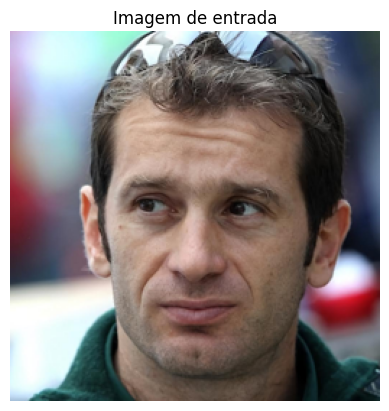

In [ ]:
import torch
import torch.nn.functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from networks.freqnet import freqnet  # Adjust if the path is different

# ====== CONFIGURATION ======
model_path = "/content/FreqNet-DeepfakeDetection/4-classes-freqnet-v2.pth"
image_path = "/content/FreqNet-DeepfakeDetection/dataset/GANGen-Detection/AttGAN/1_fake/182638_10.png"  # Swap with your image path
num_classes = 1  # Was FreqNet trained for binary detection? (1 = fake or real)

# ====== PRE-PROCESSING WITH FFT ======
def load_image_fft(image_path):
    img = Image.open(image_path).convert('RGB')  # Load as RGB
    img = img.resize((256, 256))  # Same size as training

    img_np = np.array(img)

    # Process each channel
    fft_channels = []
    for i in range(3):
        channel = img_np[:, :, i]
        f = np.fft.fft2(channel)
        fshift = np.fft.fftshift(f)
        # Calculate the magnitude spectrum and convert to log scale
        magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

        # Normalization to [0, 1]
        magnitude_spectrum = (magnitude_spectrum - magnitude_spectrum.min()) / \
                             (magnitude_spectrum.max() - magnitude_spectrum.min())
        fft_channels.append(magnitude_spectrum)

    # Stack channels and convert to tensor (1, 3, H, W)
    magnitude_spectrum_stacked = np.stack(fft_channels, axis=0)
    tensor = torch.from_numpy(magnitude_spectrum_stacked).unsqueeze(0).float()

    # Model normalization: [-1, 1]
    # This transforms the [0, 1] normalized magnitude spectrum to the [-1, 1] range
    tensor = (tensor - 0.5) / 0.5

    return tensor


# ====== LOAD MODEL ======
def load_model(model_path, num_classes):
    model = freqnet(num_classes=num_classes)
    state_dict = torch.load(model_path, map_location='cuda' if torch.cuda.is_available() else 'cpu')
    model.

Probabilidade de ser FAKE: 0.00
Classificação: Real


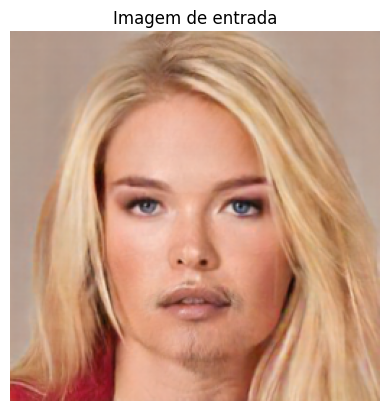

In [ ]:
import torch
import torch.nn.functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from networks.freqnet import freqnet  # adjust if the path is different

# ====== CONFIGURATION ======
model_path = "/content/FreqNet-DeepfakeDetection/4-classes-freqnet-v2.pth"
image_path = "/content/FreqNet-DeepfakeDetection/dataset/GANGen-Detection/AttGAN/1_fake/182638_10.png"  # Swap with your image path
num_classes = 1  # Was FreqNet trained for binary detection? (1 = fake or real)

# ====== PRE-PROCESSING WITH FFT ======
def load_image_fft(image_path):
    img = Image.open(image_path).convert('L')  # Load image as Grayscale ('L')
    img = img.resize((256, 256))  # Same size as training

    img_np = np.array(img)

    # FFT (2D Fourier Transform)
    f = np.fft.fft2(img_np)
    # Shift the zero-frequency component to the center
    fshift = np.fft.fftshift(f)
    # Calculate the magnitude spectrum in log scale
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

    # Normalization to [0, 1]
    magnitude_spectrum = (magnitude_spectrum - magnitude_spectrum.min()) / \
                         (magnitude_spectrum.max() - magnitude_spectrum.min())

    # Convert to tensor (1, H, W)
    tensor = torch.from_numpy(magnitude_spectrum).unsqueeze(0).float()  # (1, H, W)
    # Repeat the single channel 3 times to match the model's 3-channel input expectation
    tensor = tensor.repeat(3, 1, 1).unsqueeze(0)  # Shape: (1, 3, H, W)

    # Model normalization: [-1, 1]
    tensor = (tensor - 0.5) / 0.5

    return tensor


# ====== LOAD MODEL ======
def load_model(model_path, num_classes):
    model = freqnet(num_classes=num_classes)
    state_dict = torch.load(model_path, map_location='cuda' if torch.cuda.is_available() else 'cpu')
    model.load_state_dict(state_dict, strict=True)
    model.eval()
    model.cuda() if torch.cuda.is_available() else model.cpu()
    return model

# ====== INFERENCE ======
def predict(model, input_tensor):
    input_tensor = input_tensor.cuda() if torch.cuda.is_available() else input_tensor
    with torch.no_grad():
        output = model(input_tensor)
        # Apply sigmoid for binary classification, or softmax for multiclass
        prob = torch.sigmoid(output) if num_classes == 1 else F.softmax(output, dim=1)
    return prob.cpu().numpy()

# ====== EXECUTE ======
input_tensor = load_image_fft(image_path)
model = load_model(model_path, num_classes)
prediction = predict(model, input_tensor)

# ====== INTERPRET RESULT ======
if num_classes == 1:
    prob_fake = prediction[0][0]
    print(f'Probability of being FAKE: {prob_fake:.2f}')
    print("Classification:", "Fake" if prob_fake > 0.5 else "Real")
else:
    print("Class distribution:", prediction[0])
    predicted_class = np.argmax(prediction[0])
    print("Predicted class:", predicted_class)

# ====== Show original image ======
img_show = Image.open(image_path)
plt.imshow(img_show, cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()